## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

###1. Import and set and Tensorflow 2 and verify version

In [0]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import numpy as np

tf.__version__
tf.set_random_seed(42)

### 2. Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [174]:
print("Shape of x_train : ", x_train.shape)
print("Shape of x_test : ", x_test.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of y_test : ", y_test.shape)

Shape of x_train :  (60000, 28, 28)
Shape of x_test :  (10000, 28, 28)
Shape of y_train :  (60000,)
Shape of y_test :  (10000,)


###3. Create a list 'class_names' of below Class Names
**Class - Class Name** ==> 
0 - T-shirt, 
1 - Trouser, 
2 - Pullover, 
3 - Dress, 
4 - Coat, 
5 - Sandal, 
6 - Shirt, 
7 - Sneaker, 
8 - Bag, 
9 - Ankle boot,

In [0]:
# Mapping Classes : 
class_names = {0 : 'T-shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt', 7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle boot'}

###4. Find no.of samples in training and test dataset

In [176]:
#Check number of training examples and size of each example.
print("Shape of x_train : ", x_train.shape)

print("Fashion MNIST train -  No. Of Samples :",x_train.shape[0])

Shape of x_train :  (60000, 28, 28)
Fashion MNIST train -  No. Of Samples : 60000


In [177]:
#Check number of test examples and size of each example.
print("Shape of x_test : ", x_test.shape)

print("Fashion MNIST test -  No. Of Samples :",x_test.shape[0])

Shape of x_test :  (10000, 28, 28)
Fashion MNIST test -  No. Of Samples : 10000


###5. Find dimensions of an image in the dataset

In [178]:
print("Shape of x_train : ", x_train.shape)
print("Shape of x_test : ", x_test.shape)
print("Fashion MNIST train -  No. Of Dimensions :", x_train.shape[1])
print("Fashion MNIST test -  No. Of Dimensions :", x_test.shape[1])

Shape of x_train :  (60000, 28, 28)
Shape of x_test :  (10000, 28, 28)
Fashion MNIST train -  No. Of Dimensions : 28
Fashion MNIST test -  No. Of Dimensions : 28



### 6. Verify if existing labels/Classes are correct 

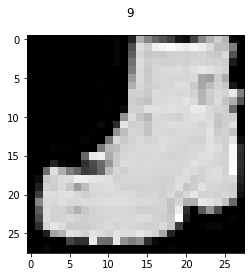

In [179]:
#Lets print the image as well.
%matplotlib inline
import matplotlib.pyplot as plt
#fig, axes = plt.subplots(4, 4, figsize = (15,15))
img_num = np.random.randint(0,x_test.shape[0])
plt.imshow(x_test[img_num],cmap='gray')
plt.suptitle(str(y_test[img_num]))
plt.show()


### 7. Convert train and test labels to one hot vectors

** check `tensorflow.keras.utils.to_categorical()` **

In [0]:
#Convert labels to one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [181]:
print("Shape of x_train : ", x_train.shape)
print("Shape of x_test  : ", x_test.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of y_test  : ", y_test.shape)

Shape of x_train :  (60000, 28, 28)
Shape of x_test  :  (10000, 28, 28)
Shape of y_train :  (60000, 10)
Shape of y_test  :  (10000, 10)


###8. Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255
y_train = y_train.astype("float32")/255
y_test = y_test.astype("float32")/255

###9. Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras
check `tensorflow.keras.backend.expand_dims`


In [183]:
print("Shape of x_train : ", x_train.shape)
print("Shape of x_test  : ", x_test.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of y_test  : ", y_test.shape)

Shape of x_train :  (60000, 28, 28)
Shape of x_test  :  (10000, 28, 28)
Shape of y_train :  (60000, 10)
Shape of y_test  :  (10000, 10)


In [184]:
tf.keras.backend.expand_dims(x_train,axis=-1)
tf.keras.backend.expand_dims(x_test,axis=-1)

<tf.Tensor 'ExpandDims_1:0' shape=(10000, 28, 28, 1) dtype=float32>

###10. Import the necessary layers from keras to build the model

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

### 11. Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with no.of `epochs=10`. **

In [0]:
#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(filters=32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

model.add(tf.keras.layers.BatchNormalization())

#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

#Add MaxPooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Flatten the output
model.add(tf.keras.layers.Flatten())

#Dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

###12. Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
#Add another dropout layer
model.add(tf.keras.layers.Dropout(0.25))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Compile the model.  
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

###13. Verify accuracy of the model

> 

In [0]:
mckpt = tf.keras.callbacks.ModelCheckpoint('./mnist_v1.h5', 
                                           monitor='val_acc', save_best_only=True)

In [0]:
model.fit(x_train,y_train,          
          validation_data=(x_test,y_test),
          epochs=5,
          batch_size=32, callbacks=[mckpt])

In [0]:
model.get_weights()

####14. Verify performance of your model selectively 

In [0]:
predictions = model.predict(x_train)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(9), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='blue')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

In [0]:
#Replace value of i with other index to check other product
i = 5
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_train, x_train)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_train)
plt.show()

### Now, to the above model, lets add Data Augmentation 

###15. Import the ImageDataGenrator from keras and fit the training images

In [0]:
datagen = ImageDataGenerator(
        rotation_range = 8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True)  # randomly flip images

In [0]:
datagen.fit(x_train)

####16. Showing 5 versions of the first image in training dataset using image datagenerator.flow()

In [0]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()